In [1]:
#|default_exp app

In [2]:
#|export
#Import necessary libraries
from fastai.vision.all import *
import gradio as gr
#from fastbook import *

In [3]:
#Define dependedent function that was used in model builidng sourcefile
def is_cat(x):
    return x.isupper()

In [4]:
#To avoid PosixPath problem
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

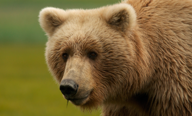

In [5]:
#Load image for testing
im = PILImage.create("grizzly_bear.jpg")
im.thumbnail((192, 192))
im

In [6]:
#Load predictor
#learn = load_learner('model.pkl')

In [7]:
#|export
bear_learner = load_learner('export.pkl')

In [8]:
bear_learner.predict(im)

('grizzly', TensorBase(1), TensorBase([2.1265e-05, 9.9990e-01, 8.1385e-05]))

In [9]:
#|export

#Create function that accepth image path and 
labels = bear_learner.dls.vocab
def predict(img):
    pred, idx, probs = bear_learner.predict(img)
    return {labels[i]: round(float(probs[i]), 2) for i in range(len(labels))}

In [10]:
predict(im)

{'black': 0.0, 'grizzly': 1.0, 'teddy': 0.0}

In [113]:
# import warnings
# warnings.filterwarnings(action="ignore", category=UserWarning)

In [18]:
#|export
examples = ["grizzly_bear.jpg", "black_bear.jpg", "teddy_bear.jpg"]
interface = gr.Interface(fn=predict, 
                         inputs=gr.inputs.Image(shape=(512, 512)),
                         outputs=gr.outputs.Label(num_top_classes=3))

interface.launch(inline=False, share=True)

C:\Users\Dell\anaconda3\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Dell\anaconda3\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861/
Running on public URL: https://45427.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x2632e573d00>,
 'http://127.0.0.1:7861/',
 'https://45427.gradio.app')

In [21]:
import nbdev

In [22]:
help(nbdev.export)

Help on module nbdev.export in nbdev:

NAME
    nbdev.export - # AUTOGENERATED! DO NOT EDIT! File to edit: ../nbs/04a_export.ipynb.

CLASSES
    builtins.object
        ExportModuleProc
    
    class ExportModuleProc(builtins.object)
     |  A processor which exports code to a module
     |  
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)

FUNCTIONS
    black_format(cell, force=False)
        Format code with `black`
    
    create_modules(path, dest, procs=None, debug=False, mod_maker=<class 'nbdev.maker.ModuleMaker'>)
        Create module(s) from notebook
    
    nb_export(nbname, lib_path=Non

In [23]:
from nbdev.export import notebook2script

Socket exception: An existing connection was forcibly closed by the remote host (10054)
Socket exception: An existing connection was forcibly closed by the remote host (10054)
